In [12]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [13]:
#initialize n lists of bits (genomes) in an array
# following a binomial distribution
def init_individual():
    arr = np.zeros(L)
    arr[:np.random.binomial(L,P)]  = 1
    np.random.shuffle(arr)
    return arr

#initialize n lists of bits (genomes) in an array
def init_population():
    return [init_individual() for i in range(N)]

#pop is array of individual lists of bits (genomes)
def phenotypes(pop):
    return np.sum(pop, axis = 1)

#a and b are two parents
def uniform_recombination(a, b):
    option = list(zip(a,b))
    return [option[i][np.random.randint(0,2)] for i in range(len(a))]

#at probability mu, flip a bit at a random position of the individual
def mutate(individual):
    if np.random.uniform(0,1) < Mu:
        
        index = np.random.randint(0, L)
        v = individual[index]
        
        if v == 1:
            individual[index] = 0
        else: 
            individual[index] = 1
            
    return individual


def reproduction_mutation(pop):
    
    phenos = phenotypes(pop)
    offspring = []
    for i in range(N):
        

        randomparentindex = np.random.randint(0, len(pop))

            
        randomparent = phenos[randomparentindex]

        yindexes = [phenoindex for phenoindex, pheno in enumerate(phenos) if np.abs(pheno - randomparent) <= Delta]
        yindexes.remove(randomparentindex)
        
        try:
            secondparentindex = yindexes[np.random.randint(0, len(yindexes))]
        except:
#             print('no partner available - 4everAlone')
            offspring.append(pop[randomparentindex])
            continue
    
    
        single_offspring = mutate(uniform_recombination(pop[randomparentindex], pop[secondparentindex]))
        #recombination + mutation

        offspring.append(single_offspring)

    return offspring

def fitness(x, yzip):
    h0 = np.exp(-((x / Gamma)**B) / B)
    h = h0 - J * np.sum(p * np.exp(- np.abs((x - y)/ R)**Alfa) / Alfa for p, y in yzip)
    return np.exp(h)

def compute_A(offspring):
    phenos_offspring = phenotypes(offspring)
    unique_phenos, n_xt = np.unique(phenos_offspring, return_counts=True)
    p_xt = n_xt/N

    alist = []
    for i,x in enumerate(unique_phenos):

        yzip = [[index,u] for index, u in enumerate(unique_phenos) if np.abs(x-u) >= R]
        alist.append(fitness(x, yzip))
    amean = np.mean(alist)
    avalues = zip(unique_phenos, np.array(alist)/amean)
    return {a: b for a,b in avalues}

def model_cycle(pop):
    
    offspring = reproduction_mutation(pop)
    
    nextgen = []
    a_dict = compute_A(offspring)
    
    while len(nextgen) < N:
        trial = offspring[np.random.randint(0, N)]
        pheno_trial = np.sum(trial)

        if np.random.uniform(0,1) < a_dict[pheno_trial]:
            nextgen.append(trial)
    
    return nextgen

In [10]:
N = 3000
P = .5

B = 5
Gamma = 5
Alfa = 2
R = 4
P = 0.5

L = 14
Delta = 3
A = L - Delta
J = 4

tau = 10000
T = 30000

delta = 3000
mu0 = 1/10
muinf = 10**-6
     

In [14]:
Population = init_population()

speciation = []

for t in range(T):
    #evolve new population
    Mu = (mu0 - muinf)*(1 - np.tanh((t-tau)/delta))/2 + muinf
    Population = model_cycle(Population)
    
    if not t%10000:
        print(datetime.datetime.now())
        unique_phenos, n_xt = np.unique(phenotypes(Population), return_counts=True)
        p_xt = n_xt/N
        speciation.append(list(zip(unique_phenos, p_xt)))
        print(speciation[-1])


/home/maarten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


2020-06-18 23:41:30.255902
[(1.0, 0.011666666666666667), (2.0, 0.071), (3.0, 0.07), (4.0, 0.03266666666666666), (5.0, 0.015666666666666666), (6.0, 0.001), (7.0, 0.0003333333333333333), (8.0, 0.0003333333333333333), (9.0, 0.0026666666666666666), (10.0, 0.5186666666666667), (11.0, 0.247), (12.0, 0.028), (13.0, 0.001)]


KeyboardInterrupt: 

In [9]:
N300spec = [[(6.0, 0.02), (7.0, 0.38333333333333336), (8.0, 0.2733333333333333), (9.0, 0.16333333333333333), (10.0, 0.12666666666666668), (11.0, 0.03333333333333333)]
,[(8, 0.02666666666666667), (9, 0.11333333333333333), (10, 0.16333333333333333), (11, 0.2733333333333333), (12, 0.29333333333333333), (13, 0.09333333333333334), (14, 0.03666666666666667)]
,[(7, 0.0033333333333333335), (8, 0.10666666666666667), (9, 0.19333333333333333), (10, 0.31333333333333335), (11, 0.20666666666666667), (12, 0.11333333333333333), (13, 0.05333333333333334), (14, 0.01)]
,[(1, 1.0)]]

N500spec = [[(2.0, 0.008), (3.0, 0.152), (4.0, 0.08), (5.0, 0.106), (6.0, 0.06), (7.0, 0.05), (8.0, 0.03), (9.0, 0.082), (10.0, 0.278), (11.0, 0.098), (12.0, 0.04), (13.0, 0.016)]
,[(10, 0.014), (11, 0.154), (12, 0.248), (13, 0.392), (14, 0.192)]
,[(10, 0.012), (11, 0.102), (12, 0.222), (13, 0.432), (14, 0.232)]
,[(7, 1.0)]]

# Assortativity A.1.1

In [106]:
Population = init_population()

speciation = []

for t in range(10000):
    
    #evolve new population
    Mu = (mu0 - muinf)*(1 - np.tanh((t-tau)/delta))/2 + muinf
    Population = model_cycle(Population)
    
    if not t%1000:
        unique_phenos, n_xt = np.unique(phenotypes(Population), return_counts=True)
        p_xt = n_xt/N
        speciation.append(list(zip(unique_phenos, p_xt)))
        print(speciation[-1])


/home/maarten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


[(6.0, 0.22), (7.0, 0.46), (8.0, 0.3), (9.0, 0.02)]
[(5, 0.05), (6, 0.09), (7, 0.13), (8, 0.18), (9, 0.29), (10, 0.22), (11, 0.04)]
[(4, 0.04), (5, 0.08), (6, 0.12), (7, 0.35), (8, 0.28), (9, 0.13)]
[(4, 0.03), (5, 0.19), (6, 0.33), (7, 0.3), (8, 0.09), (9, 0.06)]
[(6, 0.05), (7, 0.26), (8, 0.52), (9, 0.17)]
[(6, 0.27), (7, 0.72), (8, 0.01)]
[(7, 1.0)]
[(7, 1.0)]
[(7, 1.0)]
[(7, 1.0)]


[(6.0, 0.22), (7.0, 0.46), (8.0, 0.3), (9.0, 0.02)]


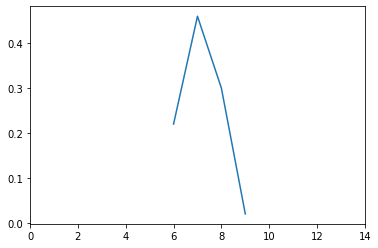

[(5, 0.05), (6, 0.09), (7, 0.13), (8, 0.18), (9, 0.29), (10, 0.22), (11, 0.04)]


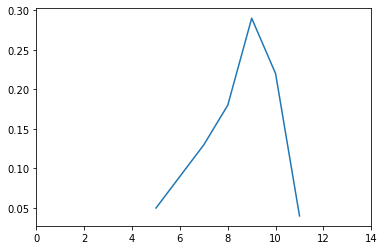

[(4, 0.04), (5, 0.08), (6, 0.12), (7, 0.35), (8, 0.28), (9, 0.13)]


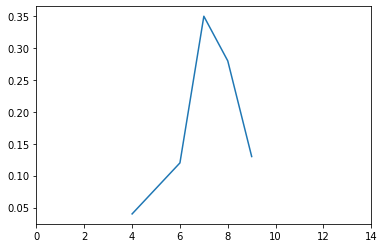

[(4, 0.03), (5, 0.19), (6, 0.33), (7, 0.3), (8, 0.09), (9, 0.06)]


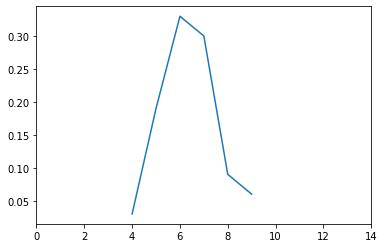

[(6, 0.05), (7, 0.26), (8, 0.52), (9, 0.17)]


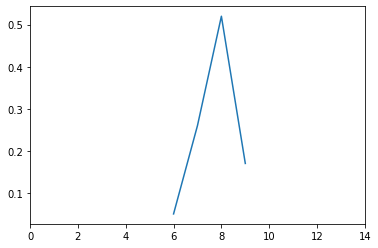

[(6, 0.27), (7, 0.72), (8, 0.01)]


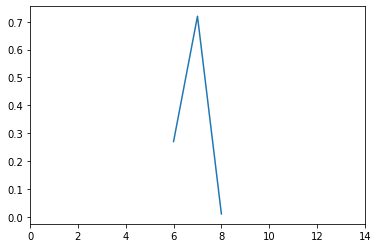

[(7, 1.0)]


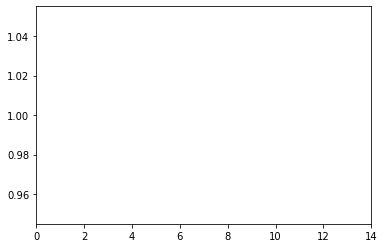

[(7, 1.0)]


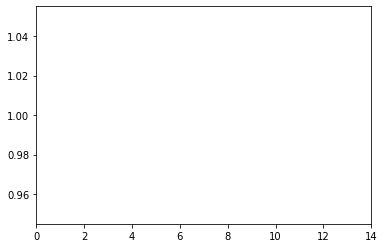

[(7, 1.0)]


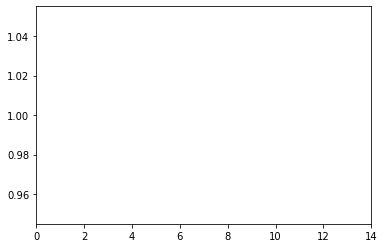

[(7, 1.0)]


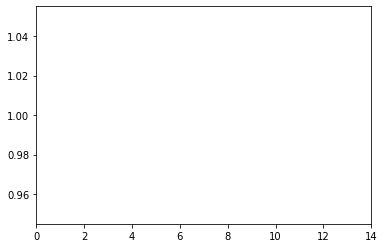

In [110]:
for i in speciation:
    print(i)
    x, y = zip(*i)
    plt.figure()
    plt.plot(x,y, 'o')
    plt.xlim(0,14)
    plt.show()

In [111]:
Population = init_population()

speciation = []

for t in range(10000):
    
    #evolve new population
    Mu = (mu0 - muinf)*(1 - np.tanh((t-tau)/delta))/2 + muinf
    Population = model_cycle(Population)
    
    if not t%1000:
        unique_phenos, n_xt = np.unique(phenotypes(Population), return_counts=True)
        p_xt = n_xt/N
        speciation.append(list(zip(unique_phenos, p_xt)))
        print(speciation[-1])


/home/maarten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


[(7.0, 0.33), (8.0, 0.29), (9.0, 0.38)]
[(6, 0.05), (7, 0.12), (8, 0.31), (9, 0.29), (10, 0.18), (11, 0.01), (12, 0.04)]
[(4, 0.05), (5, 0.15), (6, 0.26), (7, 0.2), (8, 0.22), (9, 0.08), (10, 0.04)]
[(6, 0.04), (7, 0.07), (8, 0.35), (9, 0.21), (10, 0.25), (11, 0.08)]
[(5, 0.12), (6, 0.19), (7, 0.55), (8, 0.14)]
[(5, 0.27), (6, 0.73)]
[(6, 1.0)]
[(6, 1.0)]
[(6, 1.0)]
[(6, 1.0)]


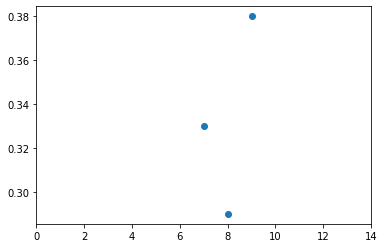

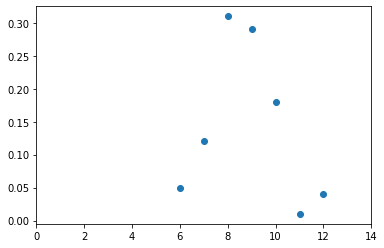

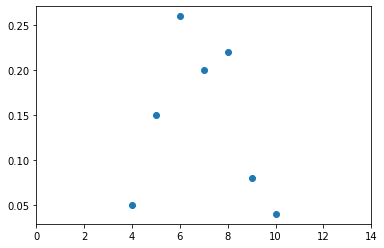

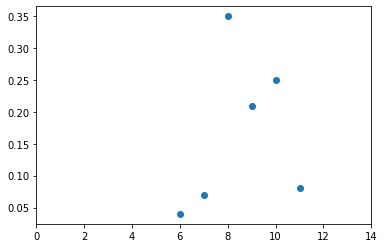

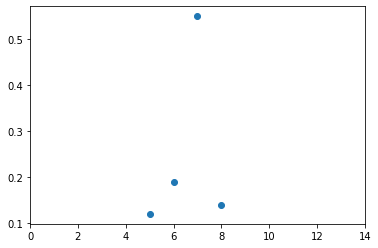

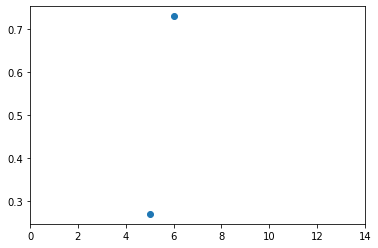

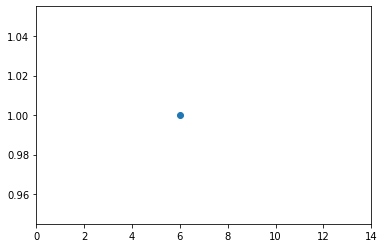

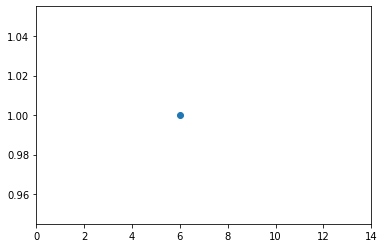

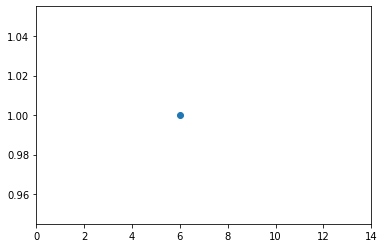

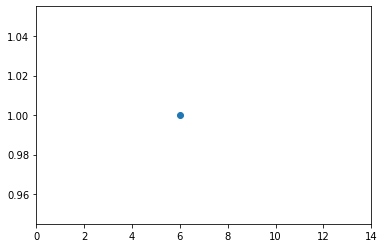

In [114]:
for i in speciation:
    x, y = zip(*i)
    plt.figure()
    plt.plot(x,y, 'o')
    plt.xlim(0,14)

# Competition

In [118]:
J = 8
Alfa = 2
R = 2
Delta = 1

In [119]:
Population = init_population()

speciation = []

for t in range(10000):
    
    #evolve new population
    Mu = (mu0 - muinf)*(1 - np.tanh((t-tau)/delta))/2 + muinf
    Population = model_cycle(Population)
    
    if not t%1000:
        unique_phenos, n_xt = np.unique(phenotypes(Population), return_counts=True)
        p_xt = n_xt/N
        speciation.append(list(zip(unique_phenos, p_xt)))
        print(speciation[-1])

        
        

/home/maarten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


[(3.0, 0.08), (4.0, 0.11), (5.0, 0.18), (6.0, 0.16), (7.0, 0.22), (8.0, 0.12), (9.0, 0.05), (11.0, 0.01), (12.0, 0.05), (13.0, 0.02)]
[(0.0, 0.59), (1.0, 0.33), (2.0, 0.05), (5.0, 0.01), (6.0, 0.02)]
[(0.0, 0.53), (1.0, 0.24), (2.0, 0.09), (6.0, 0.05), (7.0, 0.09)]
[(0.0, 0.18), (1.0, 0.38), (2.0, 0.29), (3.0, 0.06), (5.0, 0.03), (6.0, 0.01), (7.0, 0.05)]
[(8, 0.04), (9, 0.01), (10, 0.23), (11, 0.64), (12, 0.08)]
[(9, 1.0)]
[(10, 1.0)]
[(10, 1.0)]
[(10, 1.0)]
[(10, 1.0)]


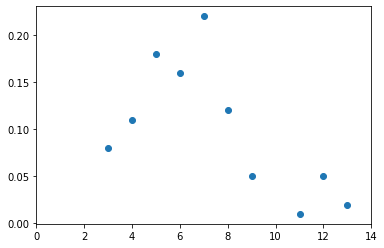

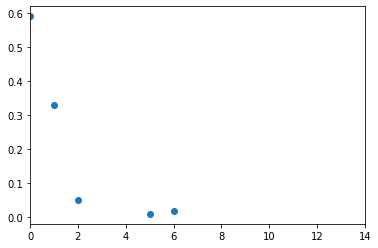

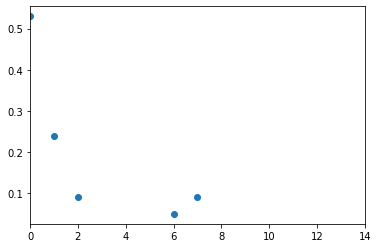

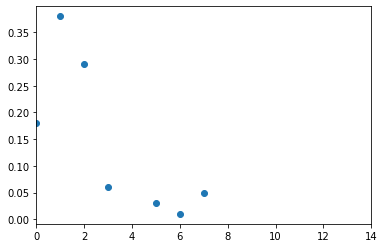

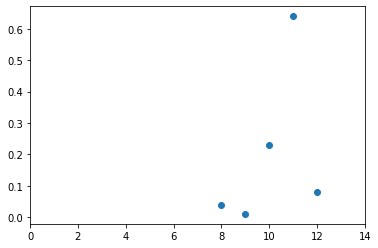

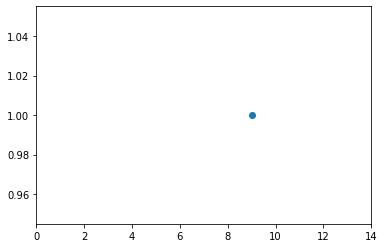

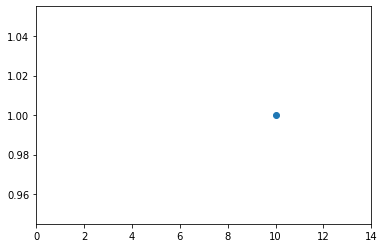

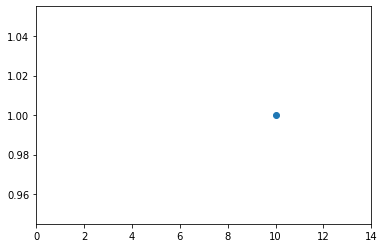

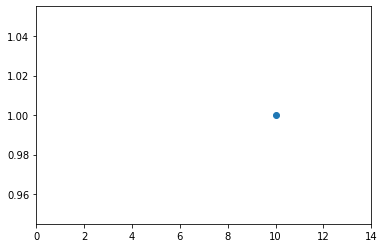

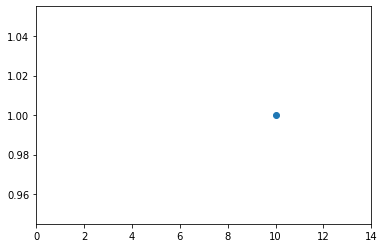

In [120]:
for i in speciation:
    x, y = zip(*i)
    plt.figure()
    plt.plot(x,y, 'o')
    plt.xlim(0,14)

# Play area

[ 7.  7.  8.  7.  8.  7.  6.  7.  8.  6.  8.  7. 12. 10.  4.  9.  7.  8.
  5.  6.  9.  3.  9.  6.  7.  6.  8.  8.  5.  8.  8. 10. 10.  6.  7.  6.
  6.  6. 10.  7.  5.  7. 10.  5.  8.  7.  6.  9.  9.  7.  7.  3.  8.  6.
 10.  9.  7.  8. 10.  8.  9.  6.  8.  5.  6.  5.  9.  7. 10.  9.  9.  5.
  9.  4.  8.  9.  6.  9. 10.  7. 10.  8.  5.  8.  6.  6.  6.  5.  4.  3.
  8.  6.  6.  7.  8. 10.  4. 10.  8.  5.]


(0, 14)

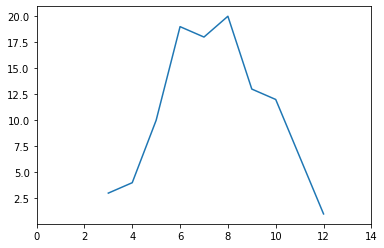

In [86]:
#investigate initial population following a binomial distribution
P = .5
Population = init_population()
print(phenotypes(Population))
x, y = np.unique(phenotypes(Population), return_counts=True)

plt.figure()
plt.plot(x, y)
plt.xlim(0,14)

In [166]:
# #model implementation in the limit where rho -> infinity
# def model_cycle(pop, delta, mu, l, b, gamma, j, r, p, alpha):
    
#     np.random.shuffle(pop)
#     phenos = phenotypes(pop)
#     offspring = []    
        
#     while len(offspring) <= len(pop):
#         #select initial random parent
#         randomparentindex = np.random.randint(0, len(phenos))
#         randomparent = phenos[randomparentindex]
        
#         #select second partent randomly from neighboorhood
#         yindexes = [phenosindex for phenosindex, phe in enumerate(phenos) if np.abs(phe - randomparent) <= delta]
#         yindexes.remove(randomparentindex)
#         secondparentindex = yindexes[np.random.randint(0, len(yindexes))]
        
#         #recombination + mutation
#         single_offspring = mutate(uniform_recombination(pop[randomparentindex], pop[secondparentindex]), mu, l)
#         #compute average fitness
#         i = yindexes[0]
#         avg_fitness = np.mean([fitness(phenos[i], np.concatenate([phenos[yindexes][:i], phenos[yindexes][i:]]), b, gamma, j, r, p, alpha) for i in yindexes])
        
#         fitness_offspring = fitness(np.sum(single_offspring), phenos[yindexes],  b, gamma, j, r, p, alpha)
                             
# #         #reproduction
#         if np.random.uniform(0,1) < fitness_offspring/avg_fitness:
#             offspring.append(single_offspring)
#     return offspring                            


                    

In [167]:
population = init_population()

In [168]:
phenotypes(population)

array([ 7,  6,  6,  9,  6,  6,  7,  6,  9,  8,  7,  5,  8,  8,  5,  9,  5,
        5,  6,  9, 11,  4,  6,  5,  6,  8,  6,  7,  8,  5,  6,  9,  9,  8,
        7,  6,  8,  4,  8,  8, 12,  8,  8,  6,  4,  9,  8,  7,  9,  6,  5,
        9,  8,  6,  6,  9,  4, 10,  7, 10,  9,  8,  8, 12,  9,  6,  9,  5,
       10,  4,  9,  4,  7,  6,  7,  6,  4,  5,  6,  7,  7,  5,  9,  6, 11,
        7,  7, 10, 10,  4,  9,  7,  7,  7,  8, 10,  9,  6,  5,  9])

In [169]:
Adict = {i:0 for i in range(L+1)}

print(Adict)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0}


/home/maarten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


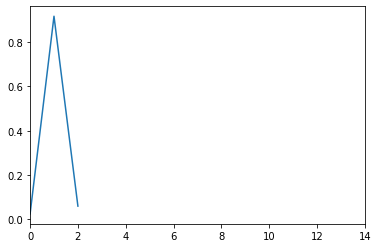

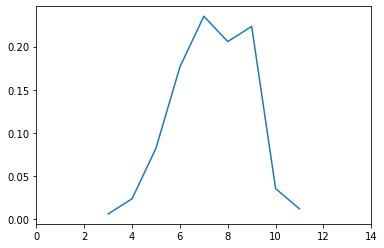

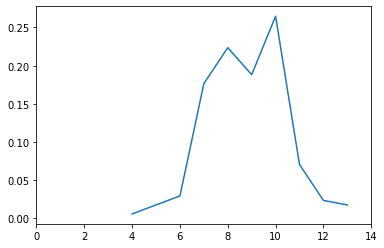

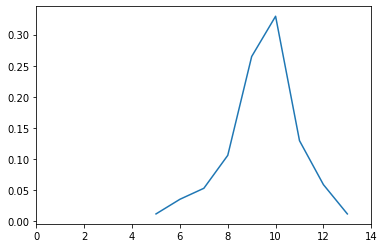

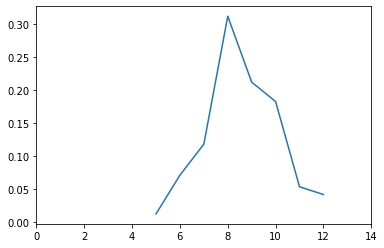

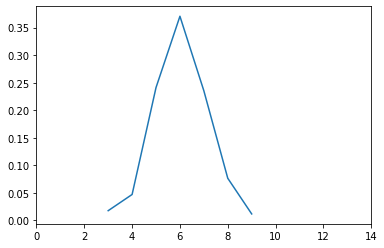

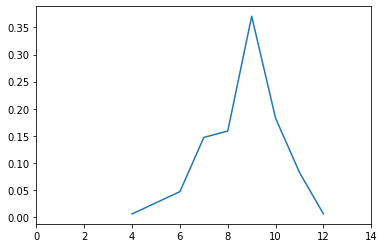

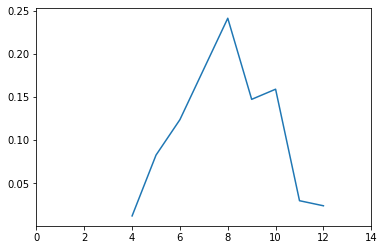

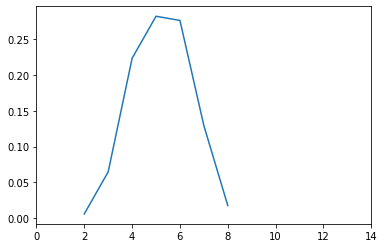

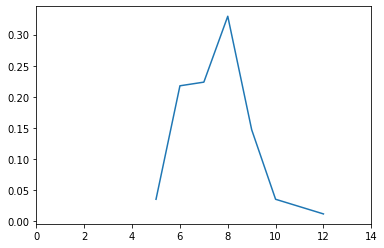

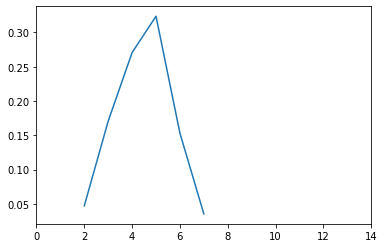

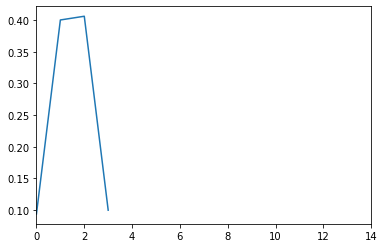

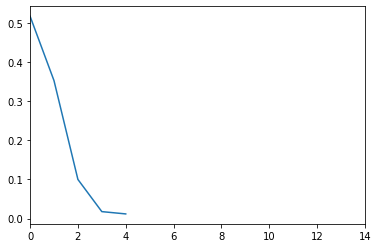

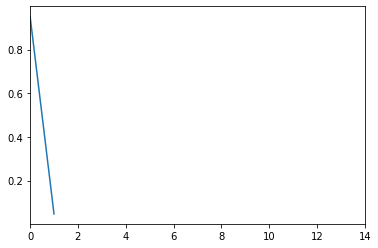

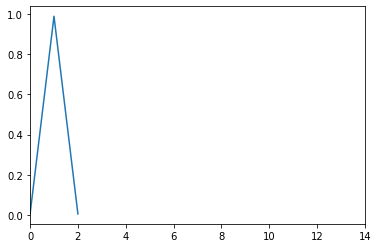

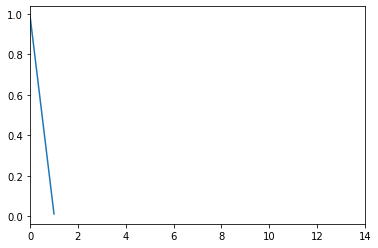

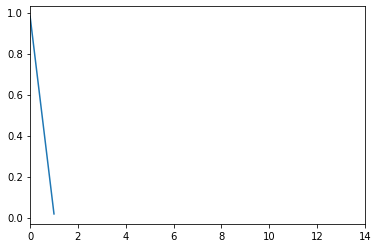

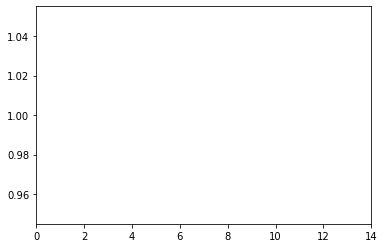

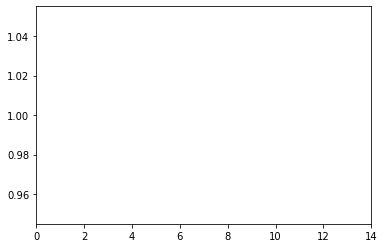

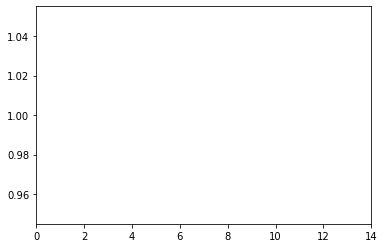

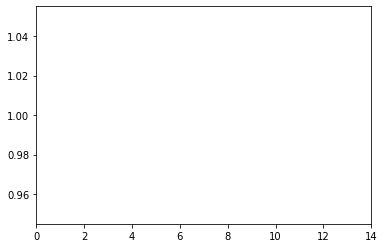

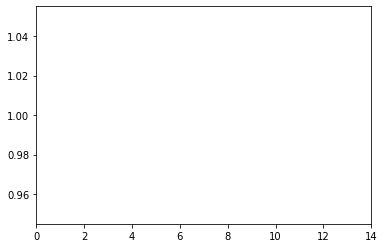

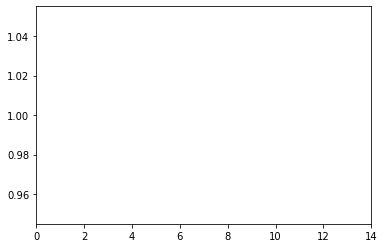

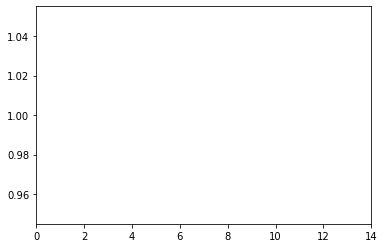

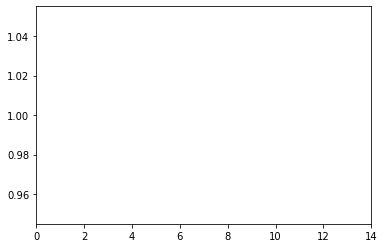

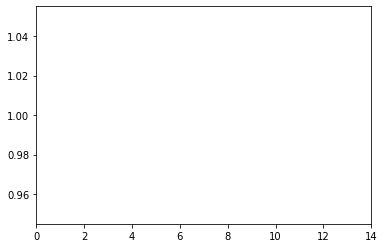

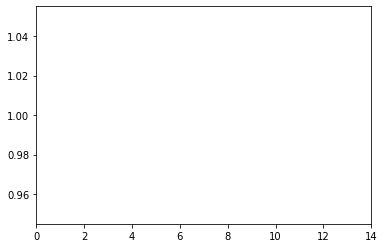

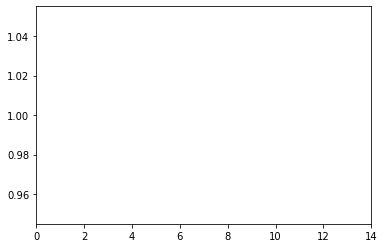

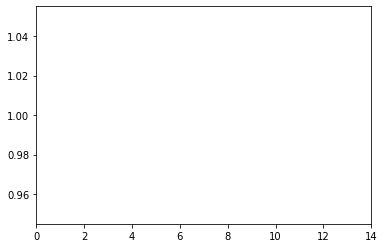

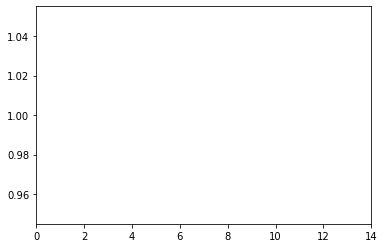

In [17]:
specs = [[(0, 0.023529411764705882), (1, 0.9176470588235294), (2, 0.058823529411764705)], [(3, 0.0058823529411764705), (4, 0.023529411764705882), (5, 0.08235294117647059), (6, 0.17647058823529413), (7, 0.23529411764705882), (8, 0.20588235294117646), (9, 0.2235294117647059), (10, 0.03529411764705882), (11, 0.011764705882352941)], [(4, 0.0058823529411764705), (6, 0.029411764705882353), (7, 0.17647058823529413), (8, 0.2235294117647059), (9, 0.18823529411764706), (10, 0.2647058823529412), (11, 0.07058823529411765), (12, 0.023529411764705882), (13, 0.01764705882352941)], [(5, 0.011764705882352941), (6, 0.03529411764705882), (7, 0.052941176470588235), (8, 0.10588235294117647), (9, 0.2647058823529412), (10, 0.32941176470588235), (11, 0.12941176470588237), (12, 0.058823529411764705), (13, 0.011764705882352941)], [(5, 0.011764705882352941), (6, 0.07058823529411765), (7, 0.11764705882352941), (8, 0.31176470588235294), (9, 0.21176470588235294), (10, 0.18235294117647058), (11, 0.052941176470588235), (12, 0.041176470588235294)], [(3, 0.01764705882352941), (4, 0.047058823529411764), (5, 0.2411764705882353), (6, 0.37058823529411766), (7, 0.23529411764705882), (8, 0.07647058823529412), (9, 0.011764705882352941)], [(4, 0.0058823529411764705), (6, 0.047058823529411764), (7, 0.14705882352941177), (8, 0.1588235294117647), (9, 0.37058823529411766), (10, 0.18235294117647058), (11, 0.08235294117647059), (12, 0.0058823529411764705)], [(4, 0.011764705882352941), (5, 0.08235294117647059), (6, 0.12352941176470589), (7, 0.18235294117647058), (8, 0.2411764705882353), (9, 0.14705882352941177), (10, 0.1588235294117647), (11, 0.029411764705882353), (12, 0.023529411764705882)], [(2, 0.0058823529411764705), (3, 0.06470588235294118), (4, 0.2235294117647059), (5, 0.2823529411764706), (6, 0.27647058823529413), (7, 0.12941176470588237), (8, 0.01764705882352941)], [(5, 0.03529411764705882), (6, 0.21764705882352942), (7, 0.2235294117647059), (8, 0.32941176470588235), (9, 0.14705882352941177), (10, 0.03529411764705882), (12, 0.011764705882352941)], [(2, 0.047058823529411764), (3, 0.17058823529411765), (4, 0.27058823529411763), (5, 0.3235294117647059), (6, 0.15294117647058825), (7, 0.03529411764705882)], [(0, 0.09411764705882353), (1, 0.4), (2, 0.40588235294117647), (3, 0.1)], [(0, 0.5176470588235295), (1, 0.35294117647058826), (2, 0.1), (3, 0.01764705882352941), (4, 0.011764705882352941)], [(0, 0.9529411764705882), (1, 0.047058823529411764)], [(0, 0.0058823529411764705), (1, 0.9882352941176471), (2, 0.0058823529411764705)], [(0, 0.9882352941176471), (1, 0.011764705882352941)], [(0, 0.9823529411764705), (1, 0.01764705882352941)], [(0, 1.0)], [(0, 1.0)], [(0, 1.0)], [(0, 1.0)], [(0, 1.0)], [(0, 1.0)], [(0, 1.0)], [(0, 1.0)], [(0, 1.0)], [(0, 1.0)], [(0, 1.0)], [(0, 1.0)], [(0, 1.0)]]
# specs = [[(7, 0.09523809523809523), (8, 0.8412698412698413), (9, 0.06349206349206349)], [(1, 0.09523809523809523), (2, 0.36507936507936506), (3, 0.2222222222222222), (4, 0.2222222222222222), (5, 0.07936507936507936), (6, 0.015873015873015872)], [(4, 0.15873015873015872), (5, 0.4603174603174603), (6, 0.38095238095238093)], [(0, 0.06349206349206349), (1, 0.15873015873015872), (2, 0.36507936507936506), (3, 0.15873015873015872), (4, 0.06349206349206349), (5, 0.19047619047619047)], [(4, 0.07936507936507936), (5, 0.31746031746031744), (6, 0.38095238095238093), (7, 0.09523809523809523), (8, 0.07936507936507936), (9, 0.047619047619047616)], [(1, 0.047619047619047616), (2, 0.31746031746031744), (3, 0.25396825396825395), (4, 0.31746031746031744), (5, 0.06349206349206349)], [(4, 0.015873015873015872), (5, 0.23809523809523808), (6, 0.3333333333333333), (7, 0.23809523809523808), (8, 0.14285714285714285), (9, 0.031746031746031744)], [(1, 0.06349206349206349), (2, 0.49206349206349204), (3, 0.2857142857142857), (4, 0.12698412698412698), (5, 0.031746031746031744)], [(2, 0.2222222222222222), (3, 0.23809523809523808), (4, 0.19047619047619047), (5, 0.30158730158730157), (6, 0.047619047619047616)], [(1, 0.14285714285714285), (2, 0.3333333333333333), (3, 0.36507936507936506), (4, 0.09523809523809523), (5, 0.015873015873015872), (7, 0.047619047619047616)], [(2, 0.1746031746031746), (3, 0.38095238095238093), (4, 0.38095238095238093), (5, 0.06349206349206349)], [(1, 0.06349206349206349), (2, 0.5079365079365079), (3, 0.3968253968253968), (4, 0.031746031746031744)], [(2, 0.09523809523809523), (3, 0.31746031746031744), (4, 0.42857142857142855), (5, 0.15873015873015872)], [(0, 0.06349206349206349), (1, 0.31746031746031744), (2, 0.6190476190476191)], [(1, 0.23809523809523808), (2, 0.7619047619047619)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)], [(1, 1.0)]]


for i in specs:
    x, y = zip(*i)
    plt.figure()
    plt.plot(x,y)
    plt.xlim(0,14)